# Project billard 

## Table of Contents

*   1. Introduction

*   2. Square case billard

      A) Square case billard animation

      B) Statistics
      
      C) Sources 
      

*   3. Flat torus case

      A) Torus reoresentation

      B) Flat torus billard animation

      C) Statistics
      
      D) Sources
      

*  4. Eliptic case 

## 1. Introduction 

The goal of this project is to be able to produce videos and widget representing a point/ball in a billiard with a simple shape and showing its trajectory in three different cases, square case, flat torus case and elliptic case. in the first two cases we are going to play a name game : when the ball hit the top or bottom part you add an H (H for horizontal) and when the ball hit the left or right part, add a V (V for vertical). and the we will perform a statistical analysis of the words creating depending on the angle use to start the trajectory (restrict may be to words of size <2000).
In order to achieve our goal we are going to need a multiple packages, most of the have been seen in software development course,and we are gonig to use a tkinter package in order to create a graphical user interface(a GUI),wich handles users inputs and outputs .  
    

In [1]:
from tkinter import* 
import math
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML

## 2. Square case billard

Square case billiard, with no friction and satisfying the Descartes rules.

### A) square case billard animation 

In [2]:

# initialisation of parameters 

angle = 0
speed = 20
WIDTH = 500 #width of the billard
HEIGHT = 500 # height of the billard
X1rec = WIDTH/2 - 20 # first 
Y1rec = HEIGHT/2 - 20
X2rec = X1rec + 20
Y2rec = Y1rec + 20
X1Line = 0
Y1Line = 0
X2Line = 0
Y2Line = 0
Name = str()
test = "v,h"
button = False
## calculate the coorrdenate of the pool stick
def calculateLinePosition():
    global X1Line
    X1Line = X1rec +(X2rec - X1rec)/2
    global Y1Line
    Y1Line = Y1rec +(Y2rec - Y1rec)/2
    global X2Line
    X2Line = X1Line + 100*math.sin(angle*math.pi/180)
    global Y2Line
    Y2Line = Y1Line + 100*math.cos(angle*math.pi/180)

    
calculateLinePosition()

def evaluateimpact():
    global Name 
   
    
    if  Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT - 60:#when the ball hits the downside side 
        Name=Name+ test[2] 
    if  Y1rec - float(speed)*math.cos(angle*math.pi/180) <=0:#when the ball hits the upperside side
        Name=Name+ test[2]
     
    if X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH - 20:#when the ball hits the rightside side
        Name=Name+ test[0]
    if X1rec - float(speed)*math.sin(angle*math.pi/180) <=0:#when the ball hits the leftside side
        Name=Name+ test[0]
evaluateimpact()



root = Tk()#creating and openning a window
root.title("Billard Simulation")
root.geometry("800x600")#size of the window

#creatin a frame for the buttons in th bottom

bottomFrame=Frame(root)
bottomFrame.pack(side=BOTTOM)

#giv a name to our window

thelabel=Label(root,text="square case billard simulation") 
thelabel.pack()

#creating buttons (pause and restart buttons )
def pause(event):#function of the button 
    global button
    button = False
    
Pause=Button(bottomFrame,text="Pause",fg="Blue")
Pause.bind(" <Button-1>",pause)
Pause.pack(fill=X)
def Start(event):#function of the button
    global button
    button = True
restart=Button(bottomFrame,text="Start",fg="Green")
restart.bind("<Button-1>",Start)
restart.pack(fill=X)

#creating entry ( angle)

label1=Label(root,text="please choose an angle to start with then press enter")#title of the entry
label1.pack()

#obtaining data from our entry  

def evaluateangle(event):
    print("Evaluatin angle " )
    global angle
    
    
    entry = entrySpace.get()
    if entry :
        angle = float(entry)
        ans.configure(text="Your angle is " +str(angle))
        ans.pack()
        calculateLinePosition()
        canvas.delete('all')
        canvas.create_rectangle(0, 0, WIDTH, HEIGHT,fill="Green",outline='Brown')
        canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
        canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
        canvas.pack()
    
entrySpace=Entry(root)#creating an entry space    
entrySpace.bind("<Return>",evaluateangle)
entrySpace.pack()
ans=Label(root)
ans.configure(text="Your initial angle is " +  str(angle))
ans.pack()


canvas=Canvas(root,width=WIDTH,height=HEIGHT)
canvas.pack()
canvas.create_rectangle(0,0,WIDTH,HEIGHT,fill="Green",outline="brown")
canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
#canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
canvas.pack()
#code for nimation and movement conditions 
def refresh():
    if(button):
        global X1rec
        global X2rec
        global Y1rec
        global Y2rec
        global speed
        global angle
        global HEIGHT
        global WIDTH
        global Name
        global v 
        global h
        if X1rec - float(speed)*math.sin(angle*math.pi/180) >= 0 :
            if X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH - 20:
                if angle%360 >= 90 :
                    angle = (360 - angle)%360
                else :
                    angle = (angle + 270)%360
            X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)
            X2rec = X1rec + 20
               
        else :
            if angle%360 >= 90 :
                angle = (360 - angle)%360
            else :
                angle = (angle + 270)%360
            X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)
            X2rec = X1rec + 20
        if Y1rec - float(speed)*math.cos(angle*math.pi/180) >= 0:
            if Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT - 60:
                if angle%360 <= 180 :
                    angle = (360 + 180 - angle)%360
                else :
                    angle = (180 - angle)%360
            Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)
            Y2rec = Y1rec + 20
        else :
            if angle %360<= 90 :
                angle = (180 - angle)%360
            else :
                angle = (angle + 270)%360
            Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)
            Y2rec = Y1rec + 20
    
        ans.configure(text="Your angle is " +str(angle))
        ans.pack()
        calculateLinePosition()
        #canvas.delete('all')
        canvas.create_rectangle(0, 0, WIDTH, HEIGHT, fill="Green",outline="brown")
        canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
        #canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
        canvas.pack()
        
    
    canvas.after(100,refresh)# .after is supplied with "refresh function " to call after a delay of 100 
    evaluateimpact()
    ans.configure(text="The result name is" +  str( Name))# for printnig the result name in the GUI
    ans.pack()
canvas.after(1,refresh)
root.mainloop()#to maintain the window open
print(angle)
if  len(Name)<2000:
    print(Name)

## statistics  
V=0 #number of the letter v in the name 
H=0 #number of the letter H in the name
for i in range(len(Name)):
    if Name[i]=='v':
        V=V+1
    else :
        H=H+1
data=[angle,V,H]
print(Name)
print(data)


0


[0, 0, 0]


## b) statistics on a multipule simulations 

In order to extract more data from our simulation in a less time ,for every angle we are going to need a result word containig 2000 caracters, we are going to change the code above, keeping only the movement conditions("refresh" function) and our impact result("evaluateimpact" function), and chaning the angle in th code.

In [3]:


angle = 360
speed = 20
WIDTH = 500
HEIGHT = 500
X1rec = WIDTH/2 - 20
Y1rec = HEIGHT/2 - 20
X2rec = X1rec + 20
Y2rec = Y1rec + 20
X1Line = 0
Y1Line = 0
X2Line = 0
Y2Line = 0
Name = str()
test = "v,h"

def evaluateimpact():
    global Name 
   
    
    if  Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT - 60:#when the ball hits the downside side 
        Name=Name+ test[2] 
    if  Y1rec - float(speed)*math.cos(angle*math.pi/180) <=0:#when the ball hits the upperside side
        Name=Name+ test[2]
     
    if X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH - 20:#when the ball hits the rightside side
        Name=Name+ test[0]
    if X1rec - float(speed)*math.sin(angle*math.pi/180) <=0:#when the ball hits the leftside side
        Name=Name+ test[0]
evaluateimpact()



#code for nimation and movement conditions 
def refresh(angle):
    
        global X1rec
        global X2rec
        global Y1rec
        global Y2rec
        global speed
        global HEIGHT
        global WIDTH
        global Name
        global v 
        global h
        global data
        while  len(Name)<2000: 
            if X1rec - float(speed)*math.sin(angle*math.pi/180) >= 0 :
                if X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH - 20:
                    if angle%360 >= 90 :
                        angle = (360 - angle)%360
                    else :
                        angle = (angle + 270)%360
                X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)
                X2rec = X1rec + 20

            else :
                if angle%360 >= 90 :
                    angle = (360 - angle)%360
                else :
                    angle = (angle + 270)%360
                X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)
                X2rec = X1rec + 20
            if Y1rec - float(speed)*math.cos(angle*math.pi/180) >= 0:
                if Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT - 60:
                    if angle%360 <= 180 :
                        angle = (360 + 180 - angle)%360
                    else :
                        angle = (180 - angle)%360
                Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)
                Y2rec = Y1rec + 20
            else :
                if angle %360<= 90 :
                    angle = (180 - angle)%360
                else :
                    angle = (angle + 270)%360
                Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)
                Y2rec = Y1rec + 20
  
                  
            evaluateimpact()
            V=0 #number of the letter v in the name 
            H=0 #number of the letter H in the name
            for i in range(len(Name)):
                if  Name[i]=='v':
                    V=V+1
                else :
                    H=H+1
        data=[angle,V,H]
        print(data)
refresh(angle)

[0, 0, 2000]


we will start collecting data by changing the angle 

In [6]:
df=pd.DataFrame([[45, 952, 1048],[60, 1379, 621],[90, 2000, 0],[120, 1218, 782],[180, 0, 2000],[50, 682, 1318],[130, 1000, 1000],[360, 0, 2000]]
,columns=['angle','v','h'])
df

,angle,v,h
0,45,952,1048
1,60,1379,621
2,90,2000,0
3,120,1218,782
4,180,0,2000
5,50,682,1318
6,130,1000,1000
7,360,0,2000


After we gathered the number of the letter 'v', and the number of the letter 'h' in different impact name results of different angles, now we can make some simple statistic tests on our data. 

Lets start with descriptiv statistics 

In [7]:
df.describe()

,angle,v,h
count,8.000000,8.000000,8.000000
mean,129.375000,903.875000,1096.125000
std,103.938083,678.303859,678.303859
min,45.000000,0.000000,0.000000
25%,57.500000,511.500000,741.750000
50%,105.000000,976.000000,1024.000000
75%,142.500000,1258.250000,1488.500000
max,360.000000,2000.000000,2000.000000


Interpretation of the describe table: as we see there is no  big difference beteween the 'V' letter and 'H' except in the mean almost symetric angles that we chose.

In order to see the correlation of the angle whith the result name we will create a correlation matrix 

In [8]:
corrmatrix=df.corr()
corrmatrix

,angle,v,h
angle,1.000000,-0.647747,0.647747
v,-0.647747,1.000000,-1.000000
h,0.647747,-1.000000,1.000000


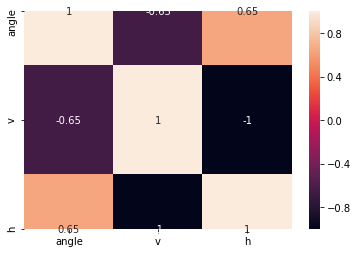

In [9]:
sn.heatmap(corrmatrix, annot=True)
plt.show()

As we see in the correlation matrix, it'is evvident that the letters 'V' and 'H' are correlated negativily, but the most important is the correlation between the angle and the letters, both letters have the same correlation coefficient and thas also normal and due to the position of the ball in the center and the almost symetric angles that we chose . 

### C) sources


* Tkinter documentation 
* matplotlib documentation 
* seaborn documentation
* repo for the course HMMA238 'Software Development'


# 2) flat torus billard case


## a) what is a torus ? 

In geometry, a torus is a surface of revolution generated by revolving a circle in three-dimensional space about an axis that is coplanar with the circle.

Torus represnetaion: the code of the torus plot was found on the internet, we only made some modifications that helped plotting the torus on a TKinter window whith "matplotlib.use('TkAgg')" function  and adding a toolbar to show all the faces of the torus with .

In [4]:
matplotlib.use('TkAgg')

root = Tk()
 

angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = 0.9, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)
# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color = 'g', rstride = 1, cstride = 1)
plt.axis('off')
plt.show()
canvas = FigureCanvasTkAgg(fig, master=root)
plot_widget = canvas.get_tk_widget()
plot_widget.grid(row=0, column=0)


root.mainloop()

## b) flat torus billard animation 

1) What is a flat torus? It is a square whose sides correspond two by two. This means that to be imaginary living in this square, each time it is sorted by the upper side it is immediately reappeared by the lower side, the same for the right and left sides.

2) With a similar method and a similar functions of the square case billard, we only change the conditions in "refresh" and "evaluateimpact" sort tha if the ball hits one of the borders it appears in the opposit border continuing exactly in the same direction   

In [5]:

# initialisation of a basic window with minimize button ...

angle = 0
speed = 20
WIDTH = 500
HEIGHT = 500
X1rec = WIDTH/2 - 20
Y1rec = HEIGHT/2 - 20
X2rec = X1rec + 20
Y2rec = Y1rec + 20
X1Line = 0
Y1Line = 0
X2Line = 0
Y2Line = 0
Name = str()
test = "v,h"
button = False
## calculate the coorrdenate of the pool stick
def calculateLinePosition():
    global X1Line
    X1Line = X1rec +(X2rec - X1rec)/2
    global Y1Line
    Y1Line = Y1rec +(Y2rec - Y1rec)/2
    global X2Line
    X2Line = X1Line + 100*math.sin(angle*math.pi/180)
    global Y2Line
    Y2Line = Y1Line + 100*math.cos(angle*math.pi/180)

    
calculateLinePosition()

def evaluateimpact():
    global Name 
   
    
    if  Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT-60 :#when the ball hits the downside side 
        Name=Name+ test[2] 
    
    if  X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH-40 :#when the ball hits the rightside side
        Name=Name+ test[0]
    
evaluateimpact()



root = Tk()#creating and openning a window
root.title("Billard Simulation")
root.geometry("800x600")#size of the window 
#creatin a frame for the buttons in th bottom

bottomFrame=Frame(root)
bottomFrame.pack(side=BOTTOM)

#giv a name to our window

thelabel=Label(root,text="flat Torus case billard simulation") 
thelabel.pack()

#creating buttons (pause and restart buttons )
def pause(event):#function of the button 
    global button
    button = False
    
Pause=Button(bottomFrame,text="Pause",fg="Blue")
Pause.bind(" <Button-1>",pause)
Pause.pack(fill=X)
def Start(event):#function of the button
    global button
    button = True
restart=Button(bottomFrame,text="Start",fg="Green")
restart.bind("<Button-1>",Start)
restart.pack(fill=X)

#creating entries ( angle)

label1=Label(root,text="please choose an angle to start with then press enter")#title of the entry
label1.pack()

#obtaining data from our entry  

def evaluateangle(event):
    print("Evaluatin angle " )
    global angle
    
    
    entry = entrySpace.get()
    if entry :
        angle = float(entry)
        ans.configure(text="Your angle is " +str(angle))
        ans.pack()
        calculateLinePosition()
        canvas.delete('all')
        canvas.create_rectangle(0, 0, WIDTH, HEIGHT,fill="Green",outline='Brown')
        canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
        canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
        canvas.pack()
    
entrySpace=Entry(root)#creating an entry space    
entrySpace.bind("<Return>",evaluateangle)
entrySpace.pack()
ans=Label(root)
ans.configure(text="Your initial angle is " +  str(angle))
ans.pack()


canvas=Canvas(root,width=WIDTH,height=HEIGHT)
canvas.pack()
canvas.create_rectangle(0,0,WIDTH,HEIGHT,fill="Green",outline="brown")
canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
#canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
canvas.pack()
def refresh():
    if(button):
        global X1rec
        global X2rec
        global Y1rec
        global Y2rec
        global speed
        global angle
        global HEIGHT
        global WIDTH
        global Name
        global v 
        global h
        angle=angle%360
       
        X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)
        X2rec = X1rec + 20
       
        Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)
        Y2rec = Y1rec + 20
        if  Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT - 60:
            Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)-500
            Y2rec = Y1rec + 20
        if  Y1rec - float(speed)*math.cos(angle*math.pi/180) <=0:
            Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)+500
            Y2rec = Y1rec + 20
        if  X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH - 20:
            X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)-500
            X2rec = X1rec + 20
        if  X1rec - float(speed)*math.sin(angle*math.pi/180) <=0:
            X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)+500
            X2rec = X1rec + 20
        ans.configure(text="Your angle is " +str(angle))
        ans.pack()
        calculateLinePosition()
        #canvas.delete('all')
        canvas.create_rectangle(0, 0, WIDTH, HEIGHT, fill="Green",outline="brown")
        canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
        #canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
        canvas.pack()
        
    
    canvas.after(100,refresh)
    evaluateimpact()
    ans.configure(text="The result name is" +  str( Name))
    ans.pack()
canvas.after(1,refresh)
root.mainloop()#to maintain the window open
print(angle)
if  len(Name)<2000:
    print(Name)



##### statistics  
V=0 #number of the letter v in the name 
H=0 #number of the letter H in the name
for i in range(len(Name)):
    if Name[i]=='v':
        V=V+1
    else :
        H=H+1
data=[angle,V,H]
print(data)

TclError: bad fill style "[[1.9        1.86110689 1.74601984 ... 1.74601984 1.86110689 1.9       ]
 [1.88157695 1.84306096 1.72908983 ... 1.72908983 1.84306096 1.88157695]
 [1.82706203 1.78966196 1.67899293 ... 1.67899293 1.78966196 1.82706203]
 ...
 [1.82706203 1.78966196 1.67899293 ... 1.67899293 1.78966196 1.82706203]
 [1.88157695 1.84306096 1.72908983 ... 1.72908983 1.84306096 1.88157695]
 [1.9        1.86110689 1.74601984 ... 1.74601984 1.86110689 1.9       ]]": must be none, x, y, or both

## c) statistics on a multipule simulations

Even if the sides in a flat torus square are absurd we decided to concider them realy existing in order to make some simple statistics, so to  extract more data from our simulation, we are going to change the code above, keeping only the movement conditions and our impact result 

In [ ]:

angle=360
speed = 20
WIDTH = 500
HEIGHT = 500
X1rec = WIDTH/2 - 20
Y1rec = HEIGHT/2 - 20
X2rec = X1rec + 20
Y2rec = Y1rec + 20
X1Line = 0
Y1Line = 0
X2Line = 0
Y2Line = 0
Name = str()
test = "v,h"
def refresh(angle):
        global X1rec
        global X2rec
        global Y1rec
        global Y2rec
        global speed
        global HEIGHT
        global WIDTH
        global Name
        global v 
        global h
        global data
        while  len(Name)<2000:
       
            X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)
       
            Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)
        
            if  Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT - 60:
                Name=Name+ test[2]
                Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)-500
            if  Y1rec - float(speed)*math.cos(angle*math.pi/180) <=0:
                Name=Name+ test[2]
                Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)+500
            if  X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH - 20:
                Name=Name+ test[0]
                X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)-500
            if  X1rec - float(speed)*math.sin(angle*math.pi/180) <=0:
                Name=Name+ test[0]
                X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)+500
            V=0 #number of the letter v in the name 
            H=0 #number of the letter H in the name
            for i in range(len(Name)):
                    if Name[i]=='v':
                        V=V+1
                    else :
                        H=H+1
            data=[angle,V,H]
        print(data)
       


  
refresh(angle)

we will start collecting data by changing the angle 

In [ ]:
df2=pd.DataFrame([[30, 299, 1701],[45, 478, 1522],[60, 489, 1511],[90, 2000, 0],[120, 488, 1512],[180, 0, 2000],[220, 723, 1277],[280, 652, 1348],[320, 723, 1278],[360, 0, 2000]],columns=['angle','v','h'])
df2

After we gathered the number of the letter 'v', and the number of the letter 'h' in different impact name results of different angles, now we can make some simple statistic tests on our data. 

Lets start with descriptiv statistics 

In [13]:
df2.describe()

,angle,v,h
count,10.000000,10.000000,10.000000
mean,170.500000,585.200000,1414.900000
std,119.964115,561.854232,561.827069
min,30.000000,0.000000,0.000000
25%,67.500000,343.750000,1295.500000
50%,150.000000,488.500000,1511.500000
75%,265.000000,705.250000,1656.250000
max,360.000000,2000.000000,2000.000000


Interpretation of the describe table: even if the sides of a flat torus are absurd, we can see that there is a slight diffrenece in the number of the letters 'V' and 'H', and a difference in the Mean of these letters.

In order to see the correlation of the angle whith the result name we will create a correlation matrix 

In [17]:
corrmatrix2=df2.corr()
corrmatrix2

,angle,v,h
angle,1.000000,-0.208377,0.208634
v,-0.208377,1.000000,-1.000000
h,0.208634,-1.000000,1.000000


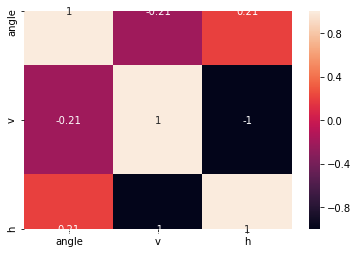

In [18]:
sn.heatmap(corrmatrix2, annot=True)
plt.show()

As we see in the correlation matrix, it'is evvident that the letters 'V' and 'H' are correlated negativily, but the most important is the correlation between the angle and the letters, both letters have almost the same correlation coefficient 0.208377 for 'V' and 0.208634 for 'H'  and thas also normal and due to the position of the ball in the center and the almost symetric angles that we chose .

## D) sources 

### Tkinter documentation 
### matplotlib documentation 
### seaborn documentation 
### repo for the course HMMA238 'Software Development'
### https://scipython.com/book/chapter-7-matplotlib/examples/a-torus/ for the torus plot 

# 3) Cas du billard elliptique

Le cas elliptique :

Le modèle reste semblable : une bille rebondissant sans perte de vitesse et sans effet de friction dans l'ellipse. L'objectif est d'analyser les différences occasionnées par des changements sur les conditions initiales de l'expérience, soient la position et orientation de la bille.

Rappellons que l'ellipse est un espace euclidien de dimension 2 où chaque point possede une somme des distances aux deux foyers constante.

Cet espace vérifie l'equation $x^2/a^2 + y^2/b^2 = 1$, avec a la longueur du grand rayon, b celle du petit.

De nouveau, il est clair que les suivis de la bille risquent d'etre déterminés exclusivement par les conditions initiales ; il s'agit donc de générer ce tracer geométriquement.

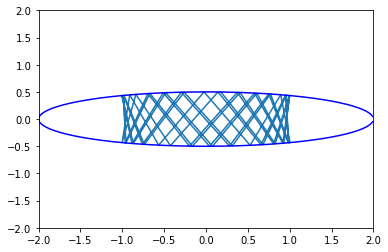

In [9]:

def ball(xo,yo,mo):
	c=yo-mo*xo            ## on a pose y = mx+c                            
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)    ##  resolution de l equation du second degré   
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)     ##     
	if abs(xn-xo)<eps and abs(yn-yo)<eps :             
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b) 
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)  
		mn=(2.0+d*mo)/(-d+2.0*mo)              ## calcul de la nouvelle direction apres le choc, notons quon retrouve facilement
	except ZeroDivisionError:                  ## l angle en degres si besoin
		mn=-mo
	
	return xn,yn,mn


a=2       
b=0.5
x0=0.707106781     ## point de depart
y0=1.414213562
m0=3.0**0.5             ##  pente initiale

x1=0.0       ## pour initialiser
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ord_succ=[]
pentes_succ = []      
ecarts_succ =[]                  
for i in range(50):              ## on itere sur  par exemple 50 rebonds
    x1,y1,m1=ball(x0,y0,m0)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1



from matplotlib import pyplot as plt

plt.axis([-2, 2, -2, 2])

plt.plot(abs_succ,ord_succ)
x = np.arange(-2, 2, 0.01)
y=[]
for i in range(len(x)):
    y.append(b*math.sqrt(1-x[i]**2/a**2))
plt.plot(x,y,color ='blue')    
plt.plot(x,np.negative(y),color ='blue')

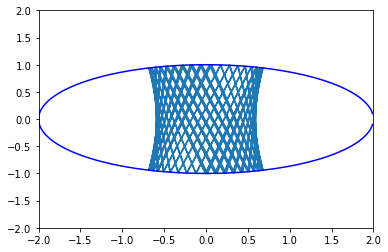

In [10]:

def ball(xo,yo,mo):
	c=yo-mo*xo
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2.0   
b=1.0
x0=0.707106781  
y0=1.414213562
m0=3.0

x1=0.0    
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ord_succ=[]
pentes_succ = []
ecarts_succ =[]
for i in range(100):
    x1,y1,m1=ball(x0,y0,m0)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1


from matplotlib import pyplot as plt
fig = plt.figure()
plt.axis([-2, 2, -2, 2])
plt.plot(abs_succ,ord_succ)

x = np.arange(-2, 2, 0.01)
y=[]
for i in range(len(x)):
    y.append(b*math.sqrt(1-x[i]**2/a**2))
plt.plot(x,y,color ='blue')    
plt.plot(x,np.negative(y),color ='blue')
  
plt.show()

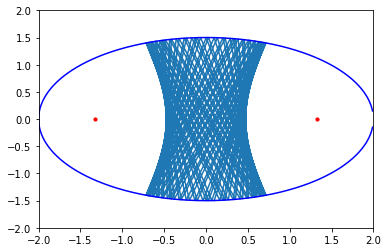

In [11]:

def ball(xo,yo,mo):
	c=yo-mo*xo
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2.0   
b=1.5
x0=0.707106781
y0=1.414213562
m0=3.0

x1=0.0      
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ord_succ=[]
pentes_succ = []
ecarts_succ =[]
for i in range(100):   
    x1,y1,m1=ball(x0,y0,m0)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1


from matplotlib import pyplot as plt

plt.axis([-2, 2, -2, 2])

plt.plot(abs_succ,ord_succ)

plt.scatter(math.sqrt(a**2-b**2), 0, s=10,color="red")       ##   on ajoute les foci en rouge
plt.scatter(-math.sqrt(a**2-b**2), 0, s=10,color="red")      ##   la trajectoire est piegee ! 

x = np.arange(-2, 2, 0.01)
y=[]
for i in range(len(x)):
    y.append(b*math.sqrt(1-x[i]**2/a**2))
plt.plot(x,y,color ='blue')    
plt.plot(x,np.negative(y),color ='blue')

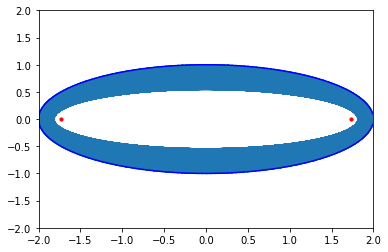

In [12]:

def ball(xo,yo,mo):
	c=yo-mo*xo
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2
b=1

x0=0.707106781  
y0=1.414213562
m0=0.5
x1=0.0       
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ord_succ=[]
pentes_succ = []
ecarts_succ =[]
for i in range(1000):
    x1,y1,m1=ball(x0,y0,m0)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1



from matplotlib import pyplot as plt

plt.axis([-2, 2, -2, 2])

plt.plot(abs_succ,ord_succ)
plt.scatter(math.sqrt(a**2-b**2), 0, s=10,color="red")      ## on s arrange cette fois pour faire asser la bille l
plt.scatter(-math.sqrt(a**2-b**2), 0, s=10,color="red")     ## entre un sommet et un focal, et on remarque la conception dune seconde 
                                                            ## ellipse

x = np.arange(-2, 2, 0.01)
y=[]
for i in range(len(x)):
    y.append(b*math.sqrt(1-x[i]**2/a**2))
plt.plot(x,y,color ='blue')    
plt.plot(x,np.negative(y),color ='blue')

done


Text(0, 0.5, 'xn+1')

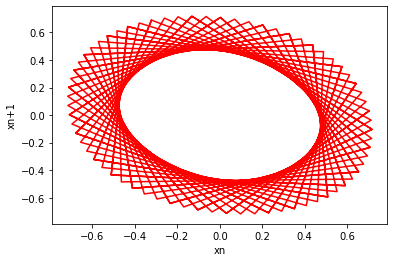

In [13]:

def ball(xo,yo,mo):
	c=yo-mo*xo
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2.0   
b=1.5
x0=0.707106781
y0=1.414213562
m0=3.0

x1=0.0       
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ord_succ=[]
pentes_succ = []
ecarts_succ =[]
for i in range(10000):
    x1,y1,m1=ball(x0,y0,m0)
   # print (i,x1,y1,m1,((x1-x0)**2+(y1-y0)**2)**0.5)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1
print ('done')

comp1 = abs_succ[0:98]
comp2 = abs_succ[1:99]
plt.plot(comp1,comp2, color="red")
plt.xlabel('xn')
plt.ylabel('xn+1')

Text(0, 0.5, 'xn+2')

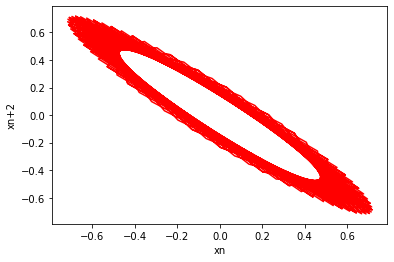

In [14]:

def ball(xo,yo,mo):
	c=yo-mo*xo
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2.0   
b=1.5
x0=0.707106781
y0=1.414213562
m0=3.0

x1=0.0       
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ordsucc=[]
pentes_succ = []
ecarts_succ =[]
for i in range(100):
    x1,y1,m1=ball(x0,y0,m0)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1


comp1 = abs_succ[0:97]
comp2 = abs_succ[2:99]
plt.plot(comp1,comp2, color="red")
plt.xlabel('xn')
plt.ylabel('xn+2')

done


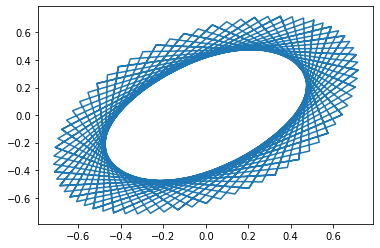

In [15]:
def ball(xo,yo,mo):
	c=yo-mo*xo
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2.0   
b=1.5
x0=0.707106781
y0=1.414213562
m0=3.0
x1=0.0      
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ord_succ=[]
pentes_succ = []
ecarts_succ =[]
for i in range(100):
    x1,y1,m1=ball(x0,y0,m0)
   # print (i,x1,y1,m1,((x1-x0)**2+(y1-y0)**2)**0.5)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1
print ('done')

comp1 = abs_succ[0:96]
comp2 = abs_succ[3:99]
plt.plot(comp1,comp2)

Text(0, 0.5, 'xn-yn')

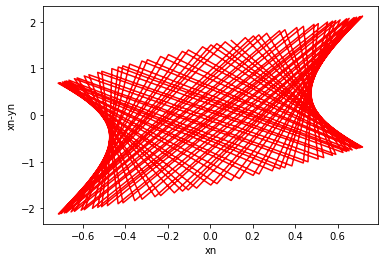

In [16]:

def ball(xo,yo,mo):
	c=yo-mo*xo
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2.0   
b=1.5
x0=0.707106781
y0=1.414213562
m0=3.0

x1=0.0     
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ord_succ=[]
pentes_succ = []
ecarts_succ =[]
for i in range(100):
    x1,y1,m1=ball(x0,y0,m0)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1


newlist = np.array([e-ord_succ[c] for c,e in enumerate(abs_succ)])
plt.plot(abs_succ,newlist, color="red")

plt.xlabel('xn')
plt.ylabel('xn-yn')

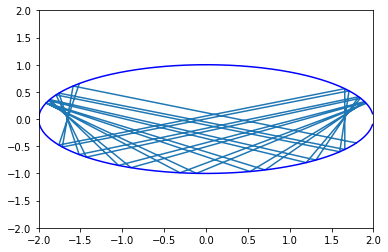

In [17]:
def ball(xo,yo,mo):
	c=yo-mo*xo            ## on a pose y = mx+c                            
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)    
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :             
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)         ## calcul de la nouvelle direction apres le choc
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2       
b=1
x0=1.414213562     ## point de depart
y0=0.707
m0=-3           ##  pente, a noter que

x1=0.0       ## pour initialiser
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ordsucc=[]
pentes_succ = []
ecarts_succ =[]
for i in range(30):              ## on itere sur  par exemple 50 rebonds
    x1,y1,m1=ball(x0,y0,m0)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ordsucc.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1



from matplotlib import pyplot as plt

plt.axis([-2, 2, -2, 2])

plt.plot(abs_succ,ordsucc)
x = np.arange(-2, 2, 0.01)
y=[]
for i in range(len(x)):
    y.append(b*math.sqrt(1-x[i]**2/a**2))
plt.plot(x,y,color ='blue')    
plt.plot(x,np.negative(y),color ='blue')

done


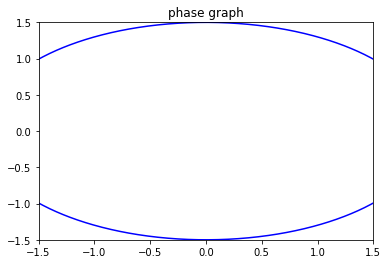

In [20]:

def ball(xo,yo,mo):
	c=yo-mo*xo
	xn=(-mo*c*a*a+a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	yn=(b*b*c+a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	if abs(xn-xo)<eps and abs(yn-yo)<eps :
		xn=(-mo*c*a*a-a*b*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
		yn=(b*b*c-a*b*mo*(a*a*mo*mo+b*b-c*c)**0.5)/(a*a*mo*mo+b*b)
	
	try :
		d=yn/xn*(a*a)/(b*b)-xn/yn*(b*b)/(a*a)
		mn=(2.0+d*mo)/(-d+2.0*mo)
	except ZeroDivisionError:
		mn=-mo
	
	return xn,yn,mn


a=2.0   
b=1.5
x0=0.707106781  
y0=1.414213562
m0=3.0

x1=0.0       
y1=0.0
m1=0.0
eps=1.e-6
abs_succ=[]
ord_succ=[]
pentes_succ = []
ecarts_succ =[]
for i in range(1000):
    x1,y1,m1=ball(x0,y0,m0)
    pentes_succ.append(m1)
    abs_succ.append(x1)
    ord_succ.append(y1)
    ecarts_succ.append(((x1-x0)**2+(y1-y0)**2)**0.5)
    x0,y0,m0=x1,y1,m1
print ('done')

import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 

fig = plt.figure() 
ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 

	x = abs_succ[i] 
	y = ord_succ[i]  
	
	# appending new points to x, y axes points list 
	xdata.append(x) 
	ydata.append(y) 
	line.set_data(xdata, ydata) 
	return line, 
	
# setting a title for the plot 
plt.title('phase graph') 

g = np.arange(-2, 2, 0.01)
h=[]
for i in range(len(g)):
    h.append(b*math.sqrt(1-g[i]**2/a**2))
plt.plot(g,h,color ='blue')    
plt.plot(g,np.negative(h),color ='blue')

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,  interval=500,frames=1000,  blit=True) 
plt.show()